<a href="https://colab.research.google.com/github/ahmadSoliman94/Machine-Learning/blob/main/ML/Electro%20Pi%20Scholarship/Data%20Police%20shootings/Data_Police_shootings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Packages Importing


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the data Files into a pandas dataframe


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [173]:
df = pd.read_csv('/content/gdrive/MyDrive/electro pi scholarship/fatal-police-shootings-data.csv')

## Showing the Head of the Data

In [174]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


## Exploratory Data Analysis


In [175]:
df.describe(include='all')

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
count,5416.000000,5416,5416,5416,5189,5181.000000,5414,4895,5416,5416,5416,5416,5167,5416
unique,NaN,5206,1844,2,93,NaN,2,6,2470,51,2,3,4,2
top,NaN,TK TK,2018-06-29,shot,gun,NaN,M,W,Los Angeles,CA,False,attack,Not fleeing,False
freq,NaN,187,9,5146,3060,NaN,5176,2476,85,799,4200,3495,3411,4798
mean,3010.398264,NaN,NaN,NaN,NaN,37.117931,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1695.786456,NaN,NaN,NaN,NaN,13.116135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3.000000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,1545.750000,NaN,NaN,NaN,NaN,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3009.500000,NaN,NaN,NaN,NaN,35.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,4486.250000,NaN,NaN,NaN,NaN,46.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Correlation

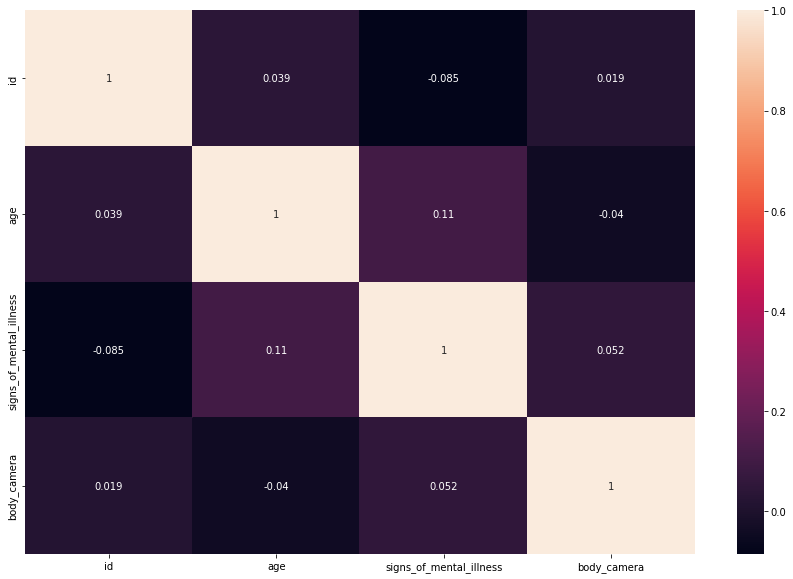

In [176]:
# Using Heatmap to visualize the Correlation.
cor = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor,annot=True)
plt.show()

## Dealing with missing values

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5189 non-null   object 
 5   age                      5181 non-null   float64
 6   gender                   5414 non-null   object 
 7   race                     4895 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5167 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

In [178]:
df.isna().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                      227
age                        235
gender                       2
race                       521
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       249
body_camera                  0
dtype: int64

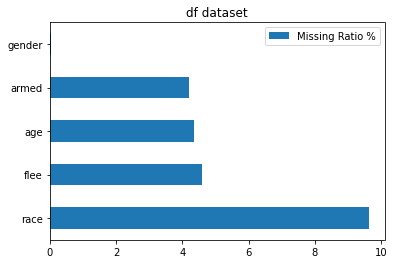

In [179]:
if df.isnull().sum().sum() != 0:
        na_df = (df.isnull().sum() / len(df)) * 100      
        na_df = na_df.drop(na_df[na_df == 0].index).sort_values(ascending=False)
        missing_data = pd.DataFrame({'Missing Ratio %' :na_df})
        missing_data.plot(kind = "barh")
        plt.title('df dataset')
        plt.show()

In [180]:
df = df.apply(lambda x: x.fillna(x.mode()[0]))

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       5416 non-null   int64  
 1   name                     5416 non-null   object 
 2   date                     5416 non-null   object 
 3   manner_of_death          5416 non-null   object 
 4   armed                    5416 non-null   object 
 5   age                      5416 non-null   float64
 6   gender                   5416 non-null   object 
 7   race                     5416 non-null   object 
 8   city                     5416 non-null   object 
 9   state                    5416 non-null   object 
 10  signs_of_mental_illness  5416 non-null   bool   
 11  threat_level             5416 non-null   object 
 12  flee                     5416 non-null   object 
 13  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), 

## examine the numerical features.


In [182]:
numeric_features = df.select_dtypes(include=[np.number])
print(numeric_features.columns)
print('****************************************************************************')
print(f'There is {numeric_features.shape[1]} numeric features.')

Index(['id', 'age'], dtype='object')
****************************************************************************
There is 2 numeric features.


## examine the categorical features.


In [183]:
categorical_features = df.select_dtypes(include=[np.object_,"category"])
print(categorical_features.columns)
print('****************************************************************************')
print(f'There is {categorical_features.shape[1]} categorical features.')

Index(['name', 'date', 'manner_of_death', 'armed', 'gender', 'race', 'city',
       'state', 'threat_level', 'flee'],
      dtype='object')
****************************************************************************
There is 10 categorical features.


## Features Disturbtions


In [184]:
df.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [185]:
df['race'].unique()

array(['A', 'W', 'H', 'B', 'O', 'N'], dtype=object)

In [186]:
# Race
race_label = ['Asian','White','Hispanic','Black','Other','Native']
data = df['race'].value_counts()

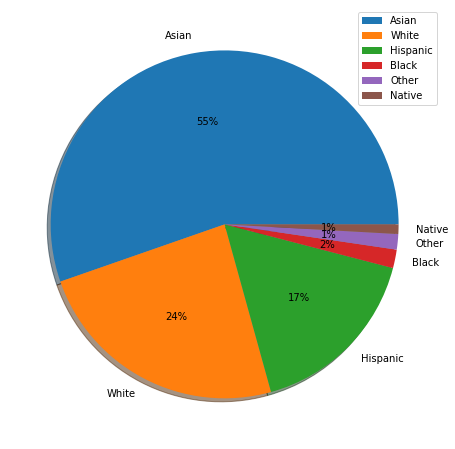

In [187]:
colors = sns.color_palette('dark')
plt.figure(figsize=(8,8))
plt.pie(x=data,labels=race_label,autopct='%.0f%%',shadow=True,)
plt.legend()
plt.show()

In [188]:
# gender 
label = ['Male','Female']
data = df['gender'].value_counts()

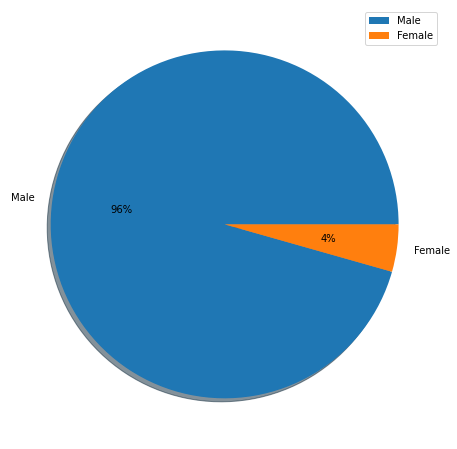

In [189]:
plt.figure(figsize=(8,8))
plt.pie(x=data,labels=label,autopct='%.0f%%',shadow=True,)
plt.legend()
plt.show()

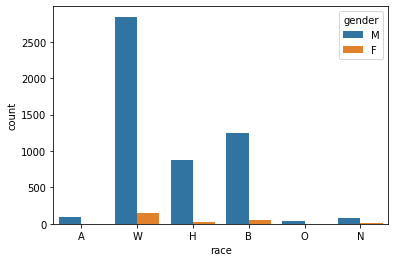

In [190]:
# gender & race(gender = female)
sns.countplot(x=df['race'],hue=df['gender'])

In [191]:
# threat level
data = df['threat_level'].value_counts()
label = df['threat_level'].unique()           

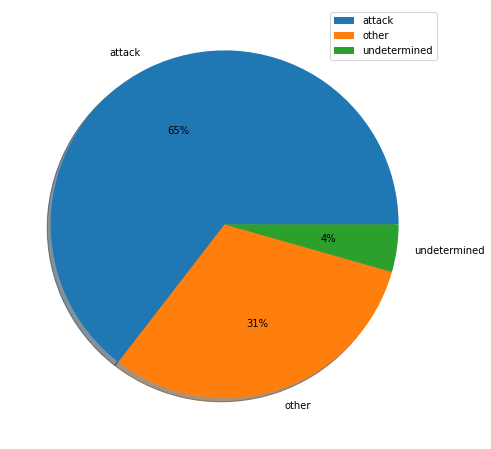

In [192]:
plt.figure(figsize=(8,8))
plt.pie(x=data,labels=label,autopct='%.0f%%',shadow=True,)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 1080x1080 with 0 Axes>

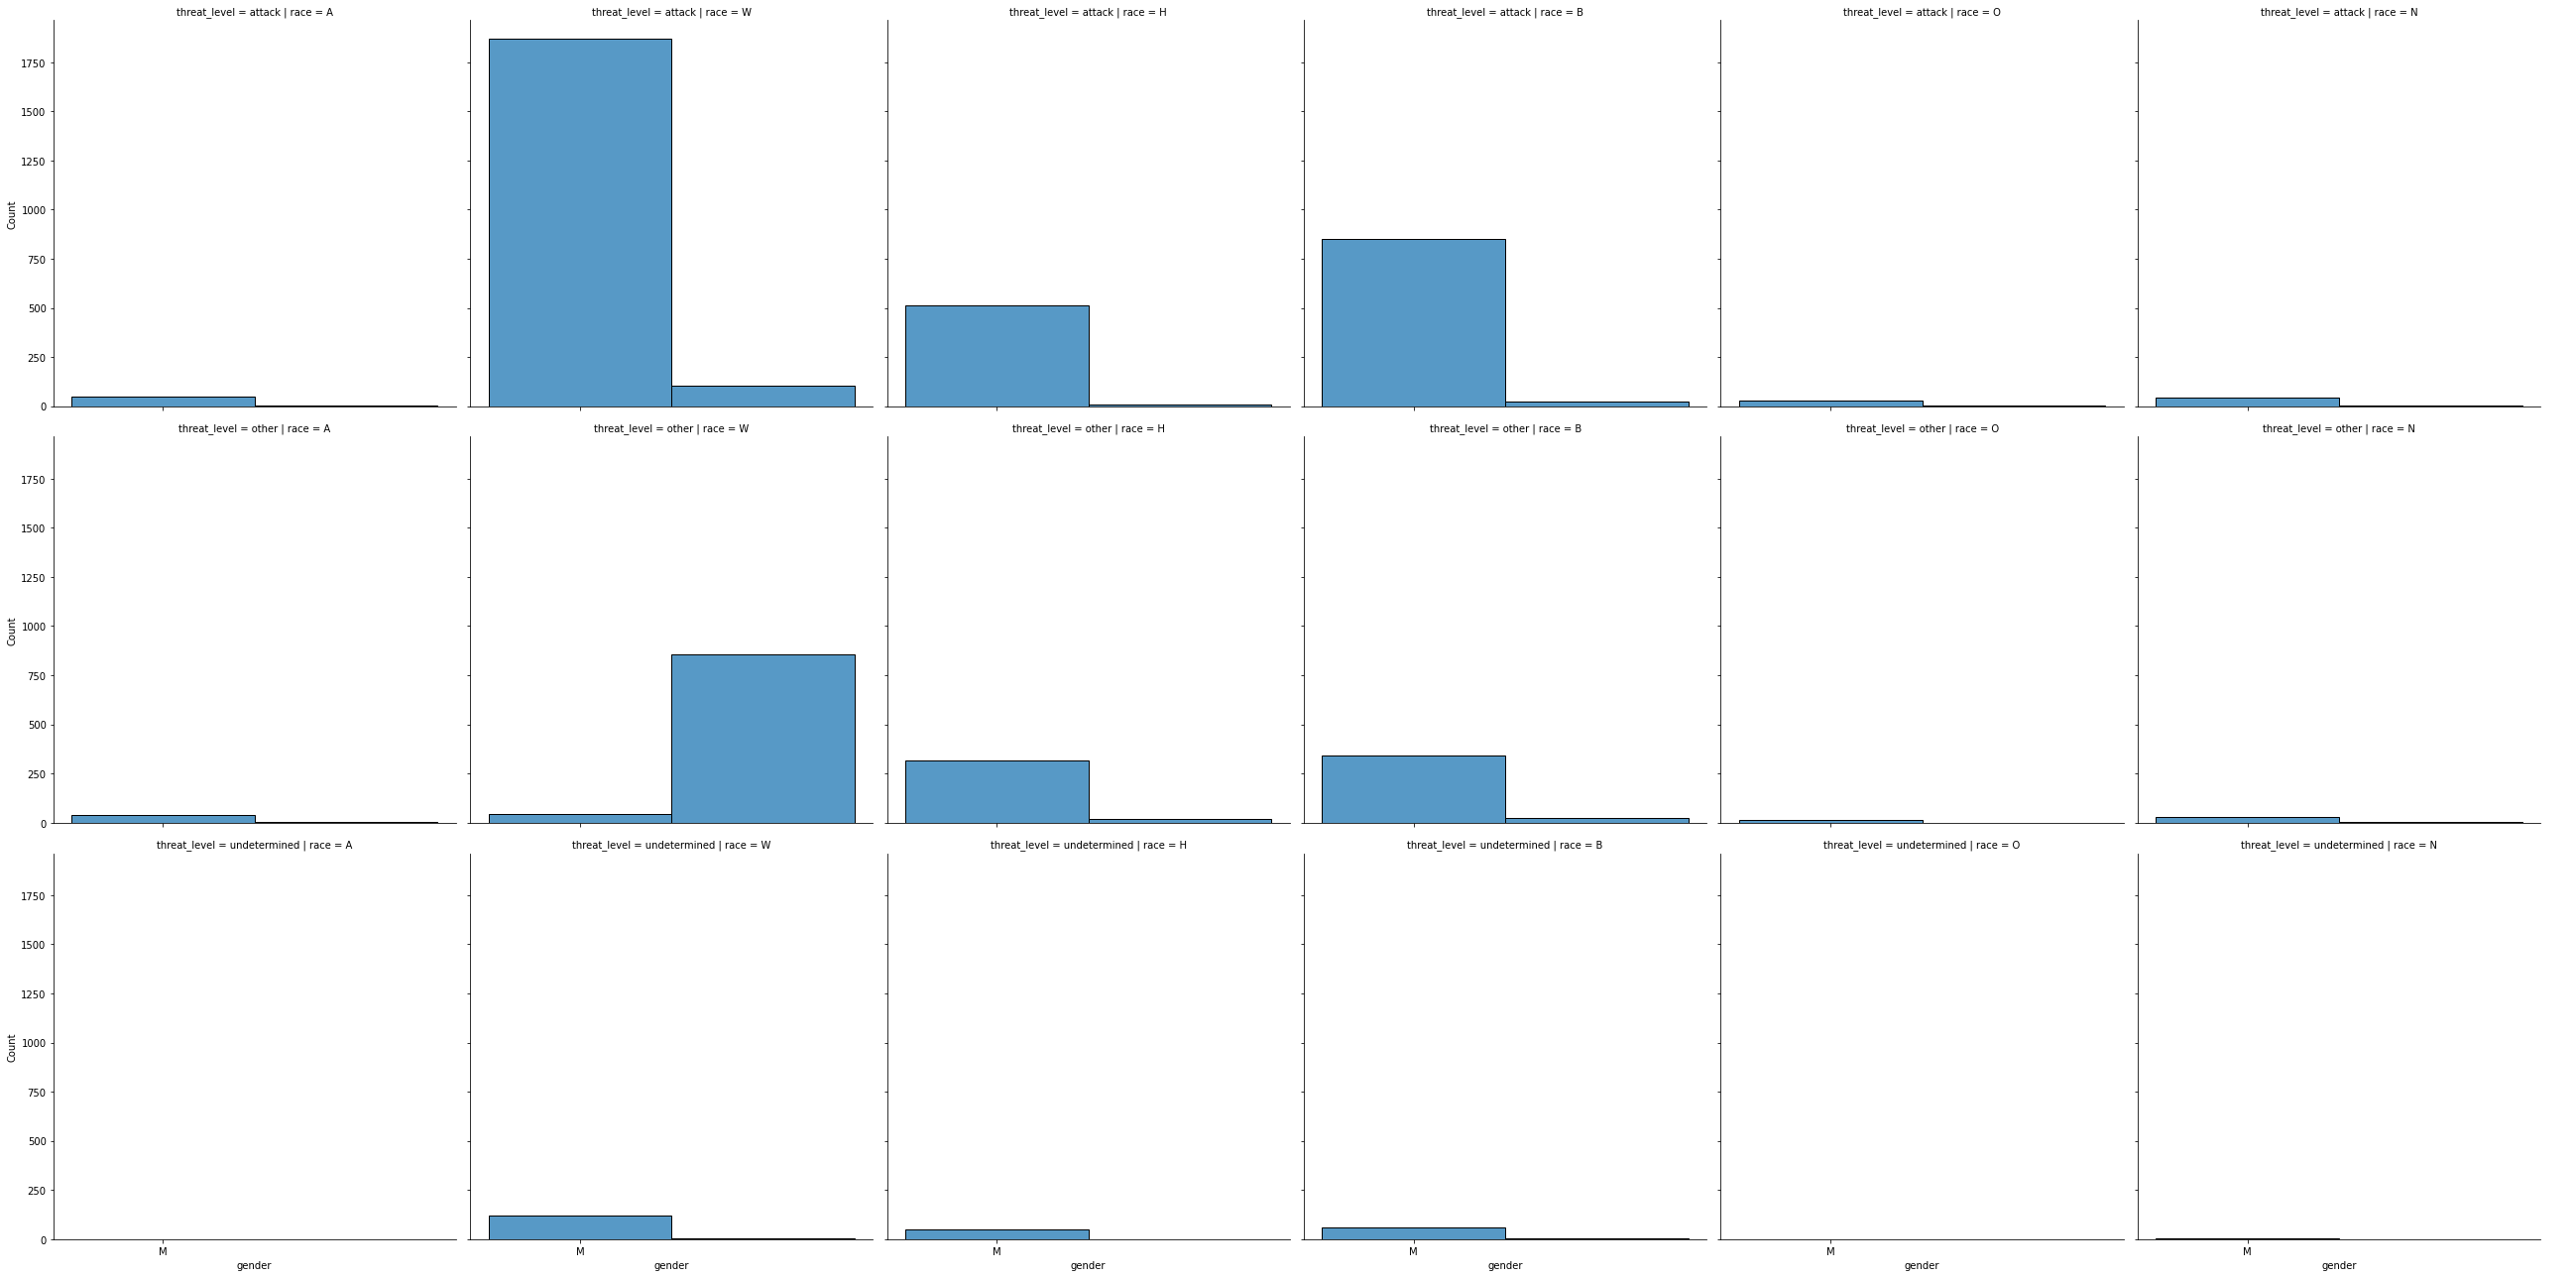

In [193]:
plt.figure(figsize=(15,15))
sns.FacetGrid(df, col='race', row='threat_level', size=6) \
   .map(sns.histplot,'gender') \
   .add_legend()

## Drop Un Necessary Columns


In [194]:
df.drop(['id','name'],axis=1,inplace=True)

## Handling object datatype

In [195]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5416 entries, 0 to 5415
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   date                     5416 non-null   object 
 1   manner_of_death          5416 non-null   object 
 2   armed                    5416 non-null   object 
 3   age                      5416 non-null   float64
 4   gender                   5416 non-null   object 
 5   race                     5416 non-null   object 
 6   city                     5416 non-null   object 
 7   state                    5416 non-null   object 
 8   signs_of_mental_illness  5416 non-null   bool   
 9   threat_level             5416 non-null   object 
 10  flee                     5416 non-null   object 
 11  body_camera              5416 non-null   bool   
dtypes: bool(2), float64(1), object(9)
memory usage: 433.8+ KB


In [196]:
df['date'] = pd.to_datetime(df['date'])

In [197]:
df.replace({False: 0, True: 1}, inplace=True)

In [198]:
cat = df.select_dtypes(include=[np.object_,"category"])


In [199]:
cat.columns.tolist()

['manner_of_death',
 'armed',
 'gender',
 'race',
 'city',
 'state',
 'threat_level',
 'flee']

In [200]:
df = pd.get_dummies(df, columns=cat.columns)

In [202]:
df.head()

,date,age,signs_of_mental_illness,body_camera,manner_of_death_shot,manner_of_death_shot and Tasered,armed_Airsoft pistol,armed_BB gun,armed_BB gun and vehicle,armed_Taser,...,state_WI,state_WV,state_WY,threat_level_attack,threat_level_other,threat_level_undetermined,flee_Car,flee_Foot,flee_Not fleeing,flee_Other
0,2015-01-02,53.0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,2015-01-02,47.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,2015-01-03,23.0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,2015-01-04,32.0,1,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
4,2015-01-04,39.0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
